# Language Success Rate vs Probe Test Spearman Analysis
Focus: Test success rates by language with probe test spearman correlation overlay

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import sys

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [7]:
df = pd.read_parquet("/VData/linna4335/llms_know_difficult/will_replication/DATA/SR_DATA/DigitalLearningGmbH_MATH-lighteval/test-Qwen-Qwen2.5-Math-1.5B-Instruct_maxlen_3000_k_50_temp_0.7.parquet")

In [2]:
SR_COLUMN = "success_rate" # majority_vote_is_correct

In [23]:
# Load test success data for all languages
languages = ['ar', 'bn', 'de', 'en', 'es', 'fr', 'id', 'it', 'ja', 'ko', 'ms', 'pt', 'ru', 'sw', 'te', 'th', 'vi', 'zh']

test_results = []
for lang in languages:
    try:
        test_file = f"/VData/linna4335/llms_know_difficult/data/Qwen/Qwen2.5-7B-Instruct/Qwen_PolyMath_{lang}/test_maxlen_3000_k_10_temp_0.7.parquet"
        df_test = pd.read_parquet(test_file)
        
        # Calculate success rate
        # majority_vote_is_correct, success_rate
        if SR_COLUMN in df_test.columns:
            success_rate = df_test[SR_COLUMN].mean()
        else:
            success_rate = np.nan
        
        test_results.append({
            'language': lang,
            'test_success_rate': success_rate,
            'num_problems': len(df_test)
        })
        print(f"✓ {lang:5s}: {success_rate:.4f} ({len(df_test)} problems)")
    except Exception as e:
        print(f"⚠ {lang}: {str(e)}")

df_test_success = pd.DataFrame(test_results)
print(f"\n✅ Loaded test success data for {len(df_test_success)} languages")

✓ ar   : 0.2370 (100 problems)
✓ bn   : 0.1870 (100 problems)
✓ de   : 0.2350 (100 problems)
✓ en   : 0.2770 (100 problems)
✓ es   : 0.2550 (100 problems)
✓ fr   : 0.2430 (100 problems)
✓ id   : 0.2470 (100 problems)
✓ it   : 0.2450 (100 problems)
✓ ja   : 0.1880 (100 problems)
✓ ko   : 0.2160 (100 problems)
✓ ms   : 0.2380 (100 problems)
✓ pt   : 0.2560 (100 problems)
✓ ru   : 0.2510 (100 problems)
✓ sw   : 0.0720 (100 problems)
✓ te   : 0.1330 (100 problems)
✓ th   : 0.2080 (100 problems)
✓ vi   : 0.2400 (100 problems)
✓ zh   : 0.2450 (100 problems)

✅ Loaded test success data for 18 languages


In [ ]:
# # Load test success data for all languages
# languages = ['ar', 'bn', 'de', 'en', 'es', 'fr', 'id', 'it', 'ja', 'ko', 'ms', 'pt', 'ru', 'sw', 'te', 'th', 'vi', 'zh']

# test_results = []
# for lang in languages:
#     try:
#         test_file = f"/VData/linna4335/llms_know_difficult/data/Qwen/Qwen2.5-7B-Instruct/Qwen_PolyMath_{lang}/test_maxlen_3000_k_10_temp_0.7.parquet"
#         df_test = pd.read_parquet(test_file)
        
#         # Calculate success rate
#         if 'success_rate' in df_test.columns:
#             success_rate = df_test['success_rate'].mean()
#         else:
#             success_rate = np.nan
        
#         test_results.append({
#             'language': lang,
#             'test_success_rate': success_rate,
#             'num_problems': len(df_test)
#         })
#         print(f"✓ {lang:5s}: {success_rate:.4f} ({len(df_test)} problems)")
#     except Exception as e:
#         print(f"⚠ {lang}: {str(e)}")

# df_test_success = pd.DataFrame(test_results)
# print(f"\n✅ Loaded test success data for {len(df_test_success)} languages")

✓ ar   : 0.2370 (100 problems)
✓ bn   : 0.1870 (100 problems)
✓ de   : 0.2350 (100 problems)
✓ en   : 0.2770 (100 problems)
✓ es   : 0.2550 (100 problems)
✓ fr   : 0.2430 (100 problems)
✓ id   : 0.2470 (100 problems)
✓ it   : 0.2450 (100 problems)
✓ ja   : 0.1880 (100 problems)
✓ ko   : 0.2160 (100 problems)
✓ ms   : 0.2380 (100 problems)
✓ pt   : 0.2560 (100 problems)
✓ ru   : 0.2510 (100 problems)
✓ sw   : 0.0720 (100 problems)
✓ te   : 0.1330 (100 problems)
✓ th   : 0.2080 (100 problems)
✓ vi   : 0.2400 (100 problems)
✓ zh   : 0.2450 (100 problems)

✅ Loaded test success data for 18 languages


In [4]:
# Load ground truth with level information and merge with test data
sys.path.insert(0, '/VData/linna4335/llms_know_difficult/thom_replication')
from create_pareto_sr_datasets import get_task

# Load test data with level information and compute level-wise success rates
test_level_results = []

for lang in languages:
    try:
        # Load ground truth dataset with levels
        ds, compute_score = get_task(f"Qwen_PolyMath_{lang}")
        gt_df = ds["test"].to_pandas()
        gt_df["level_int"] = gt_df["level"].factorize()[0]
        
        # Load test data with success rates
        test_file = f"/VData/linna4335/llms_know_difficult/data/Qwen/Qwen2.5-7B-Instruct/Qwen_PolyMath_{lang}/test_maxlen_3000_k_10_temp_0.7.parquet"
        df_test = pd.read_parquet(test_file)
        
        # Merge ground truth levels with test success rates (same order)
        df_test['level_int'] = gt_df['level_int'].values
        df_test['level_name'] = gt_df['level'].values
        
        # Calculate overall success rate
        overall_success = df_test[SR_COLUMN].mean()
        
        # Calculate success rate per level
        level_success = df_test.groupby(['level_int', 'level_name'])[SR_COLUMN].mean().reset_index()
        level_success.columns = ['level_int', 'level_name', SR_COLUMN]
        level_success['language'] = lang
        
        test_level_results.append({
            'language': lang,
            'overall_success': overall_success,
            'level_data': level_success
        })
        
        print(f"✓ {lang:5s}: {overall_success:.4f} | Levels: {sorted(df_test['level_name'].unique())}")
    except Exception as e:
        print(f"⚠ {lang}: {str(e)}")

# Combine level-wise data
df_level_wise = pd.concat([item['level_data'] for item in test_level_results], ignore_index=True)

print(f"\n✅ Loaded level-wise success rates for {len(test_level_results)} languages")
print(f"   Total level-wise records: {len(df_level_wise)}")
print(f"\nSample level-wise data:")
print(df_level_wise[df_level_wise['language'] == 'en'].to_string(index=False))


/opt/anaconda/envs/diff-direction/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


INFO 01-15 14:36:52 [__init__.py:241] Automatically detected platform cuda.
✓ ar   : 0.2370 | Levels: ['high', 'low', 'medium', 'top']
✓ bn   : 0.1870 | Levels: ['high', 'low', 'medium', 'top']
✓ de   : 0.2350 | Levels: ['high', 'low', 'medium', 'top']
✓ en   : 0.2770 | Levels: ['high', 'low', 'medium', 'top']
✓ es   : 0.2550 | Levels: ['high', 'low', 'medium', 'top']
✓ fr   : 0.2430 | Levels: ['high', 'low', 'medium', 'top']
✓ id   : 0.2470 | Levels: ['high', 'low', 'medium', 'top']
✓ it   : 0.2450 | Levels: ['high', 'low', 'medium', 'top']
✓ ja   : 0.1880 | Levels: ['high', 'low', 'medium', 'top']
✓ ko   : 0.2160 | Levels: ['high', 'low', 'medium', 'top']
✓ ms   : 0.2380 | Levels: ['high', 'low', 'medium', 'top']
✓ pt   : 0.2560 | Levels: ['high', 'low', 'medium', 'top']
✓ ru   : 0.2510 | Levels: ['high', 'low', 'medium', 'top']
✓ sw   : 0.0720 | Levels: ['high', 'low', 'medium', 'top']
✓ te   : 0.1330 | Levels: ['high', 'low', 'medium', 'top']
✓ th   : 0.2080 | Levels: ['high', 'low

In [5]:
# Load probe test spearman scores
results_base_path = Path("/VData/linna4335/llms_know_difficult/data/results/Qwen")

probe_results = []

for model_dir in sorted(results_base_path.glob("Qwen*")):
    if not model_dir.is_dir():
        continue
    
    model_name = model_dir.name
    
    # Look for Qwen_PolyMath datasets
    for dataset_dir in model_dir.glob("Qwen_PolyMath*"):
        if not dataset_dir.is_dir():
            continue
        
        dataset_name = dataset_dir.name
        lang = dataset_name.split('_')[-1]
        
        # Look for different probe types
        for probe_dir in dataset_dir.glob("*_probe"):
            if not probe_dir.is_dir():
                continue
            
            probe_type = probe_dir.name
            
            # Look for results from different runs
            for run_dir in probe_dir.glob("*"):
                if not run_dir.is_dir():
                    continue
                
                metadata_file = run_dir / "probe_metadata.json"
                if not metadata_file.exists():
                    continue
                
                try:
                    with open(metadata_file, 'r') as f:
                        metadata = json.load(f)
                    
                    # Get spearman correlation (test score)
                    spearman = metadata.get('spearman', np.nan)
                    
                    probe_results.append({
                        'language': lang,
                        'probe_type': probe_type,
                        'model_name': model_name,
                        'test_spearman': spearman
                    })
                except Exception as e:
                    pass

df_probes = pd.DataFrame(probe_results)

if len(df_probes) > 0:
    print(f"✅ Loaded {len(df_probes)} probe results")
    print(f"   Probe types: {df_probes['probe_type'].unique().tolist()}")
    print(f"\n   Sample probe data:")
    print(df_probes.head(10))
else:
    print("⚠ No probe results found")

✅ Loaded 37 probe results
   Probe types: ['tfidf_probe', 'linear_eoi_probe']

   Sample probe data:
  language        probe_type                model_name  test_spearman
0       ja       tfidf_probe  Qwen2.5-Math-7B-Instruct       0.586891
1       ja  linear_eoi_probe  Qwen2.5-Math-7B-Instruct       0.654257
2       en       tfidf_probe  Qwen2.5-Math-7B-Instruct       0.601582
3       en  linear_eoi_probe  Qwen2.5-Math-7B-Instruct       0.678115
4       it       tfidf_probe  Qwen2.5-Math-7B-Instruct       0.631041
5       it  linear_eoi_probe  Qwen2.5-Math-7B-Instruct       0.623799
6       ms       tfidf_probe  Qwen2.5-Math-7B-Instruct       0.633559
7       ms  linear_eoi_probe  Qwen2.5-Math-7B-Instruct       0.634145
8       ar       tfidf_probe  Qwen2.5-Math-7B-Instruct       0.570210
9       ar  linear_eoi_probe  Qwen2.5-Math-7B-Instruct       0.573675


In [6]:
# Aggregate probe test spearman by language and probe type
probe_by_lang = df_probes.groupby(['language', 'probe_type'])['test_spearman'].mean().reset_index()
probe_by_lang.columns = ['language', 'probe_type', 'test_spearman']

print("✅ Probe test spearman by language and type:")
print(probe_by_lang.to_string(index=False))

# Get primary probe type (most common)
primary_probe = probe_by_lang['probe_type'].value_counts().index[0]
print(f"\n📊 Primary probe type: {primary_probe}")

# Filter to primary probe type
df_probe_primary = probe_by_lang[probe_by_lang['probe_type'] == primary_probe][['language', 'test_spearman']].copy()

✅ Probe test spearman by language and type:
language       probe_type  test_spearman
      ar linear_eoi_probe       0.573675
      ar      tfidf_probe       0.570210
      bn linear_eoi_probe       0.466940
      bn      tfidf_probe       0.502574
      de linear_eoi_probe       0.626311
      de      tfidf_probe       0.630997
      en linear_eoi_probe       0.678115
      en      tfidf_probe       0.601582
      es linear_eoi_probe       0.681852
      es      tfidf_probe       0.694372
      fr linear_eoi_probe       0.692891
      fr      tfidf_probe       0.642817
      id linear_eoi_probe       0.686659
      id      tfidf_probe       0.647735
      it linear_eoi_probe       0.623799
      it      tfidf_probe       0.631041
      ja linear_eoi_probe       0.654257
      ja      tfidf_probe       0.586891
      ko linear_eoi_probe       0.611369
      ko      tfidf_probe       0.583356
      ms linear_eoi_probe       0.634145
      ms      tfidf_probe       0.633559
      pt line

In [7]:
# Load probe predictions and calculate mean prediction per language
probe_preds_results = []

for lang in languages:
    try:
        # Find probe predictions files for this language
        results_path = Path(f"/VData/linna4335/llms_know_difficult/data/results/Qwen")
        
        # Search for probe_preds.jsonl files in linear_eoi_probe
        preds_found = []
        for model_dir in results_path.glob("Qwen*"):
            if not model_dir.is_dir():
                continue
            
            dataset_dir = model_dir / f"Qwen_PolyMath_{lang}"
            if not dataset_dir.exists():
                continue
            
            probe_dir = dataset_dir / "linear_eoi_probe"
            if not probe_dir.exists():
                continue
            
            # Find the latest run directory
            run_dirs = sorted([d for d in probe_dir.iterdir() if d.is_dir()])
            if not run_dirs:
                continue
            
            latest_run = run_dirs[-1]
            preds_file = latest_run / "probe_preds.jsonl"
            
            if preds_file.exists():
                preds_found.append(preds_file)
        
        if preds_found:
            # Load and combine predictions
            all_preds = []
            for preds_file in preds_found:
                with open(preds_file, 'r') as f:
                    for line in f:
                        pred_data = json.loads(line)
                        all_preds.append(pred_data['pred'])
            
            mean_pred = np.mean(all_preds) if all_preds else np.nan
            probe_preds_results.append({
                'language': lang,
                'mean_pred': mean_pred,
                'num_preds': len(all_preds)
            })
            print(f"✓ {lang:5s}: Mean pred = {mean_pred:.4f} ({len(all_preds)} predictions)")
        else:
            probe_preds_results.append({
                'language': lang,
                'mean_pred': np.nan,
                'num_preds': 0
            })
            print(f"⚠ {lang:5s}: No predictions found")
    except Exception as e:
        probe_preds_results.append({
            'language': lang,
            'mean_pred': np.nan,
            'num_preds': 0
        })
        print(f"⚠ {lang}: {str(e)}")

df_probe_preds = pd.DataFrame(probe_preds_results)
print(f"\n✅ Loaded probe predictions for {len([p for p in probe_preds_results if p['num_preds'] > 0])} languages")
print(f"\nSample predictions by language:")
print(df_probe_preds.head(10).to_string(index=False))


✓ ar   : Mean pred = 0.2561 (100 predictions)
✓ bn   : Mean pred = 0.1691 (100 predictions)
✓ de   : Mean pred = 0.2901 (100 predictions)
✓ en   : Mean pred = 0.3335 (100 predictions)
✓ es   : Mean pred = 0.3205 (100 predictions)
✓ fr   : Mean pred = 0.2908 (100 predictions)
✓ id   : Mean pred = 0.2871 (100 predictions)
✓ it   : Mean pred = 0.3067 (100 predictions)
✓ ja   : Mean pred = 0.2514 (100 predictions)
✓ ko   : Mean pred = 0.2502 (100 predictions)
✓ ms   : Mean pred = 0.2742 (100 predictions)
✓ pt   : Mean pred = 0.2961 (100 predictions)
✓ ru   : Mean pred = 0.3092 (100 predictions)
✓ sw   : Mean pred = 0.0336 (100 predictions)
✓ te   : Mean pred = 0.0749 (100 predictions)
✓ th   : Mean pred = 0.2290 (100 predictions)
✓ vi   : Mean pred = 0.2649 (100 predictions)
✓ zh   : Mean pred = 0.3126 (100 predictions)

✅ Loaded probe predictions for 18 languages

Sample predictions by language:
language  mean_pred  num_preds
      ar   0.256113        100
      bn   0.169102        100
 

In [8]:
# Merge test success, probe spearman, and probe predictions data
df_combined = df_test_success.merge(df_probe_primary, on='language', how='left')
df_combined = df_combined.merge(df_probe_preds[['language', 'mean_pred']], on='language', how='left')

# Sort by test success rate for visualization
df_combined = df_combined.sort_values('test_success_rate', ascending=False).reset_index(drop=True)

print("✅ Combined data with predictions:")
print(df_combined.to_string(index=False))

✅ Combined data with predictions:
language  test_success_rate  num_problems  test_spearman  mean_pred
      en              0.277           100       0.678115   0.333492
      pt              0.256           100       0.663665   0.296066
      es              0.255           100       0.681852   0.320512
      ru              0.251           100       0.732887   0.309177
      id              0.247           100       0.686659   0.287146
      zh              0.245           100       0.662392   0.312622
      it              0.245           100       0.623799   0.306713
      fr              0.243           100       0.692891   0.290839
      vi              0.240           100       0.661554   0.264892
      ms              0.238           100       0.634145   0.274247
      ar              0.237           100       0.573675   0.256113
      de              0.235           100       0.626311   0.290067
      ko              0.216           100       0.611369   0.250166
      th      

In [12]:
# Load individual probe predictions, apply sigmoid threshold, and calculate success rate
from scipy.special import expit  # sigmoid function

sigmoid_success_results = []

for lang in languages:
    try:
        # Find probe predictions files for this language
        results_path = Path(f"/VData/linna4335/llms_know_difficult/data/results/Qwen")
        
        # Search for probe_preds.jsonl files in linear_eoi_probe
        preds_found = []
        for model_dir in results_path.glob("Qwen*"):
            if not model_dir.is_dir():
                continue
            
            dataset_dir = model_dir / f"Qwen_PolyMath_{lang}"
            if not dataset_dir.exists():
                continue
            
            probe_dir = dataset_dir / "linear_eoi_probe"
            if not probe_dir.exists():
                continue
            
            # Find the latest run directory
            run_dirs = sorted([d for d in probe_dir.iterdir() if d.is_dir()])
            if not run_dirs:
                continue
            
            latest_run = run_dirs[-1]
            preds_file = latest_run / "probe_preds.jsonl"
            
            if preds_file.exists():
                preds_found.append(preds_file)
        
        if preds_found:
            # Load and combine predictions
            all_preds = []
            for preds_file in preds_found:
                with open(preds_file, 'r') as f:
                    for line in f:
                        pred_data = json.loads(line)
                        all_preds.append(pred_data['pred'])
            
            # Apply sigmoid and threshold
            sigmoid_preds = expit(np.array(all_preds))
            success_rate_sigmoid = np.mean(sigmoid_preds >= 0.5)
            
            sigmoid_success_results.append({
                'language': lang,
                'sigmoid_success_rate': success_rate_sigmoid
            })
            print(f"✓ {lang:5s}: Sigmoid SR = {success_rate_sigmoid:.4f}")
        else:
            sigmoid_success_results.append({
                'language': lang,
                'sigmoid_success_rate': np.nan
            })
            print(f"⚠ {lang:5s}: No predictions found")
    except Exception as e:
        sigmoid_success_results.append({
            'language': lang,
            'sigmoid_success_rate': np.nan
        })
        print(f"⚠ {lang}: {str(e)}")

df_sigmoid_sr = pd.DataFrame(sigmoid_success_results)
df_combined = df_combined.merge(df_sigmoid_sr, on='language', how='left')

print("\n✅ Added sigmoid-based success rates:")
print(df_combined[['language', 'mean_pred', 'sigmoid_success_rate']].to_string(index=False))


✓ ar   : Sigmoid SR = 0.8900
✓ bn   : Sigmoid SR = 0.9900
✓ de   : Sigmoid SR = 0.8500
✓ en   : Sigmoid SR = 0.8200
✓ es   : Sigmoid SR = 0.7900
✓ fr   : Sigmoid SR = 0.8400
✓ id   : Sigmoid SR = 0.8200
✓ it   : Sigmoid SR = 0.8300
✓ ja   : Sigmoid SR = 0.9300
✓ ko   : Sigmoid SR = 0.9500
✓ ms   : Sigmoid SR = 0.8800
✓ pt   : Sigmoid SR = 0.8100
✓ ru   : Sigmoid SR = 0.8600
✓ sw   : Sigmoid SR = 1.0000
✓ te   : Sigmoid SR = 0.7000
✓ th   : Sigmoid SR = 0.8100
✓ vi   : Sigmoid SR = 0.9400
✓ zh   : Sigmoid SR = 0.7300

✅ Added sigmoid-based success rates:
language  mean_pred  sigmoid_success_rate
      en   0.333492                  0.82
      pt   0.296066                  0.81
      es   0.320512                  0.79
      ru   0.309177                  0.86
      id   0.287146                  0.82
      zh   0.312622                  0.73
      it   0.306713                  0.83
      fr   0.290839                  0.84
      vi   0.264892                  0.94
      ms   0.274247 

✅ High-resolution plot saved as 'language_probe_analysis_hires.png' (300 DPI)


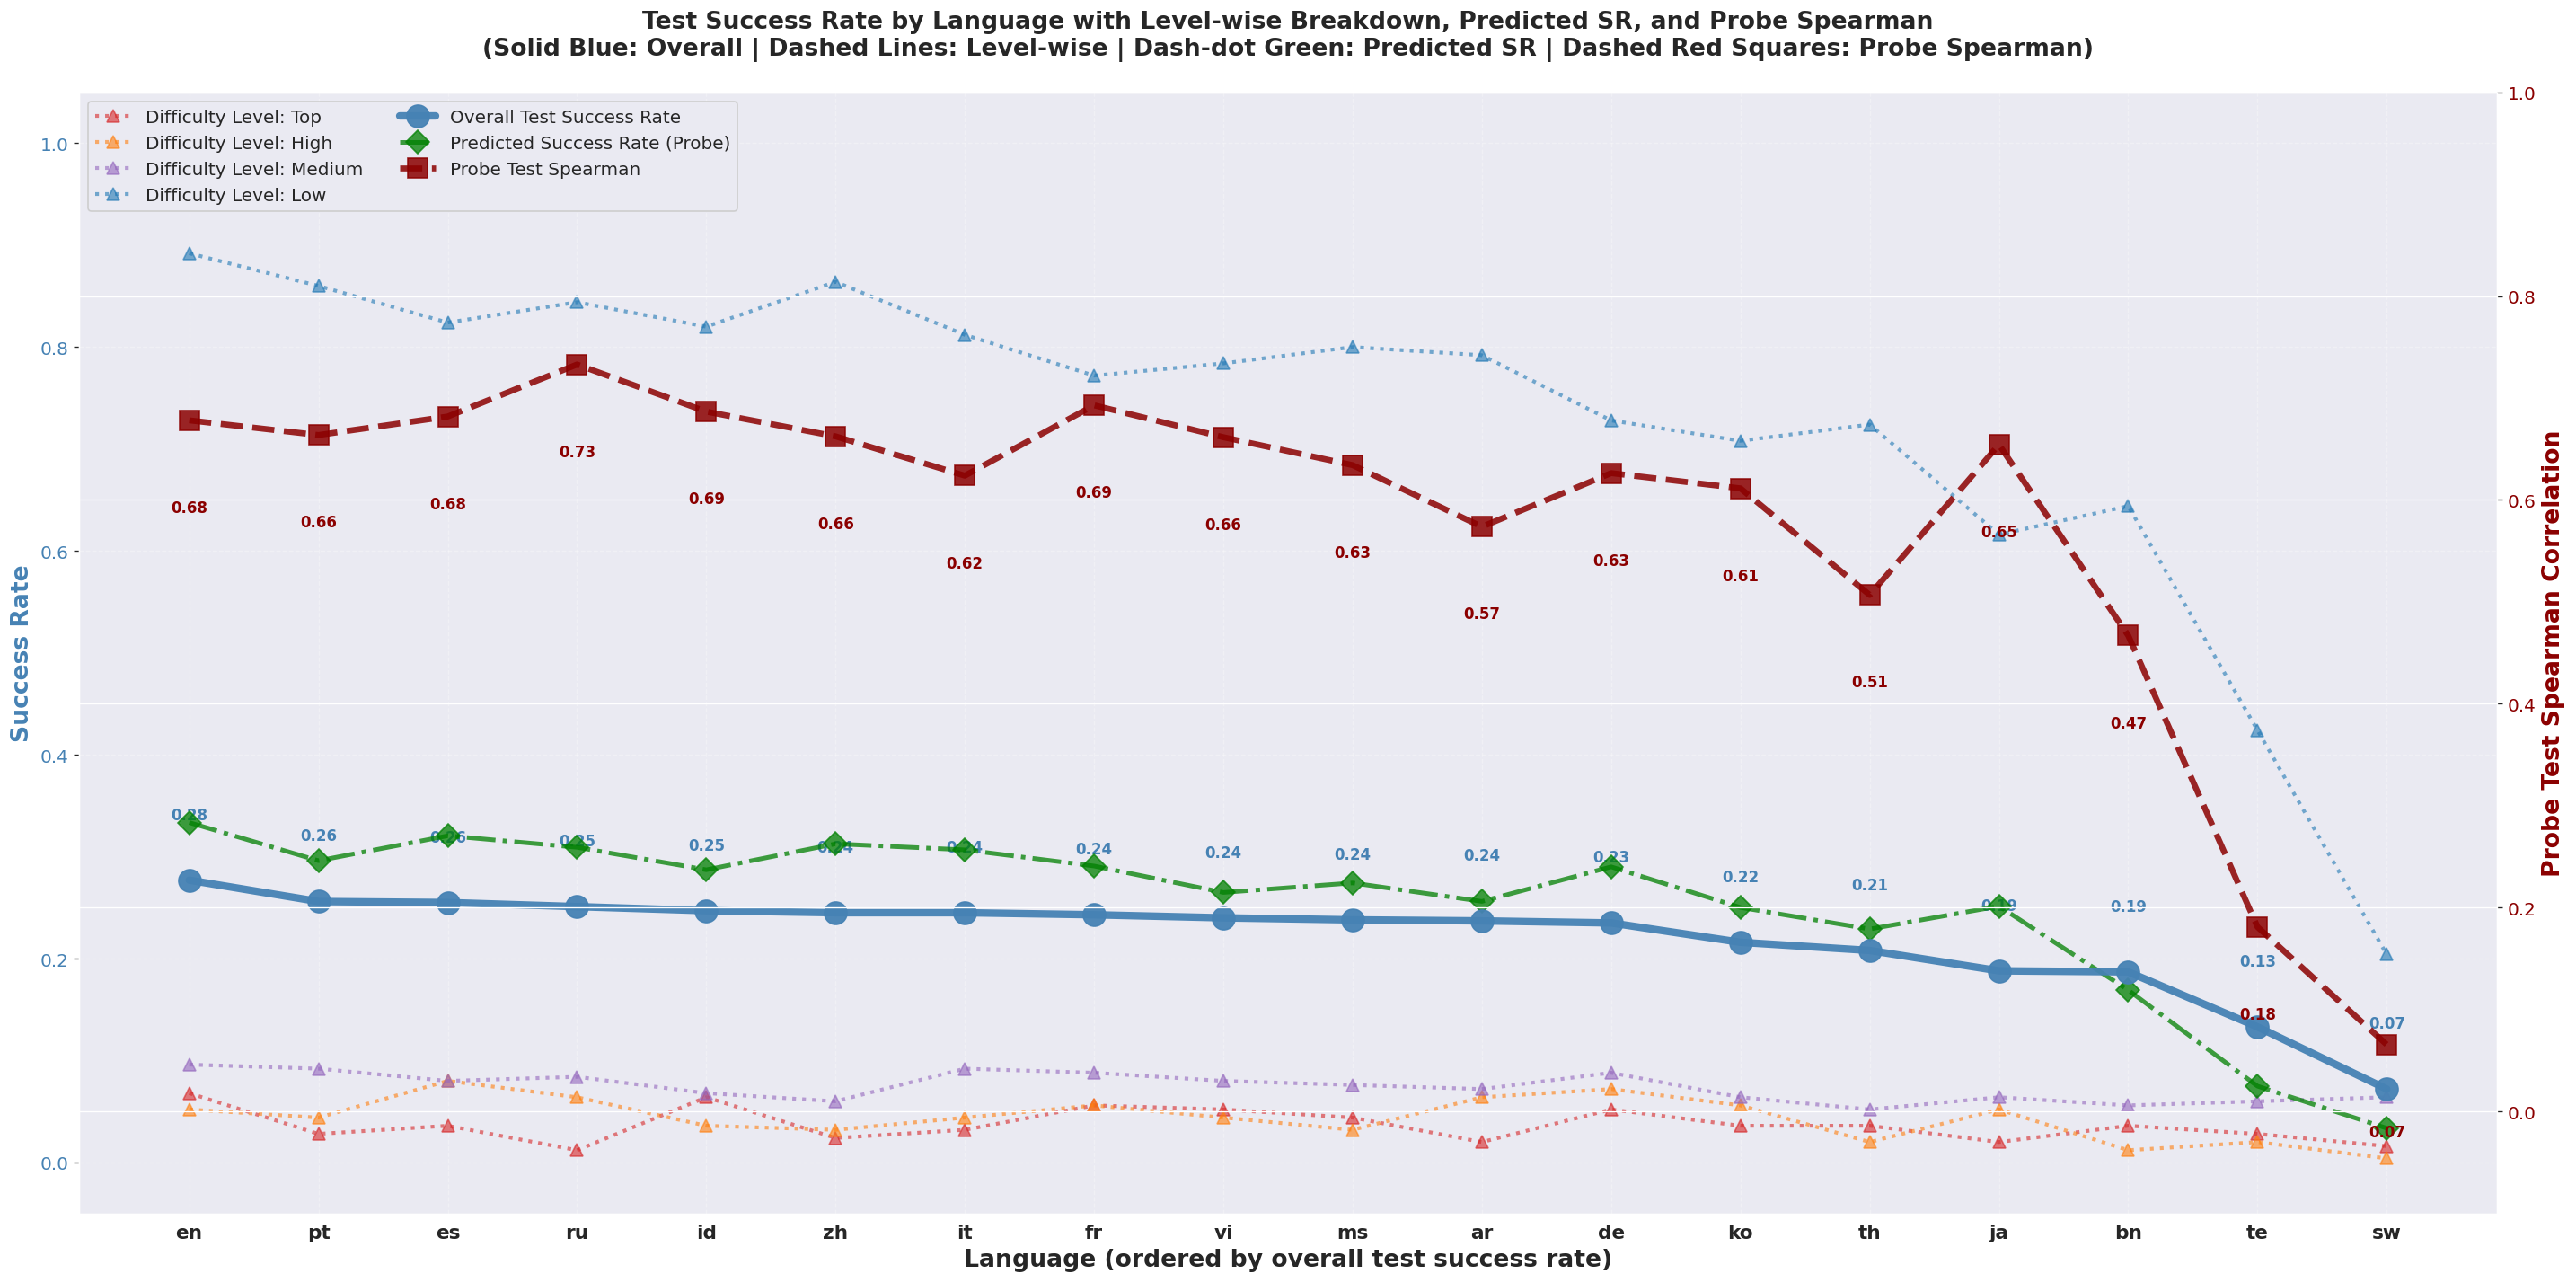

In [18]:
# Create line plot: Test Success Rate vs Probe Test Spearman by Language + Level-wise SR
# High-resolution figure settings for crisp, professional output
fig, ax1 = plt.subplots(figsize=(24, 12), dpi=120)

x_pos = np.arange(len(df_combined))
language_list = df_combined['language'].tolist()

# Define colors for each level - more distinct, avoiding green for predicted SR
level_colors = {
    'top': '#D62728',      # Dark red (hardest)
    'high': '#FF7F0E',     # Orange
    'medium': '#9467BD',   # Purple
    'low': '#1F77B4'       # Dark blue (easiest)
}

# Plot level-wise success rates (lightly) - dashed lines
for level in ['top', 'high', 'medium', 'low']:
    level_data = []
    for lang in language_list:
        lang_level = df_level_wise[(df_level_wise['language'] == lang) & (df_level_wise['level_name'] == level)]
        if len(lang_level) > 0:
            level_data.append(lang_level[SR_COLUMN].values[0])
        else:
            level_data.append(np.nan)
    
    ax1.plot(x_pos, level_data, marker='^', markersize=8, linewidth=2.5, 
             label=f'Difficulty Level: {level.capitalize()}', color=level_colors[level], 
             alpha=0.6, linestyle=':')

# Plot overall test success rate on primary y-axis (left) - solid thick line
line1 = ax1.plot(x_pos, df_combined['test_success_rate'], 
                  marker='o', markersize=15, linewidth=5, label='Overall Test Success Rate',
                  color='steelblue', alpha=0.95, zorder=10)

ax1.set_xlabel('Language (ordered by overall test success rate)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Success Rate', fontsize=16, fontweight='bold', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue', labelsize=12)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(language_list, fontsize=13, fontweight='bold')
ax1.set_ylim(-0.05, 1.05)
ax1.grid(True, alpha=0.3, linestyle='--')

# Add value labels for overall test success
for i, (x, y) in enumerate(zip(x_pos, df_combined['test_success_rate'])):
    ax1.text(x, y + 0.06, f'{y:.2f}', ha='center', fontsize=10, fontweight='bold', color='steelblue')

# Plot predicted success rate (from probe predictions)
line_pred = ax1.plot(x_pos, df_combined['mean_pred'], 
                      marker='D', markersize=11, linewidth=3, linestyle='-.', 
                      label='Predicted Success Rate (Probe)',
                      color='green', alpha=0.75, zorder=8)

# Create secondary y-axis for probe test spearman
ax2 = ax1.twinx()

# Plot probe test spearman on secondary y-axis (right)
line2 = ax2.plot(x_pos, df_combined['test_spearman'], 
                  marker='s', markersize=13, linewidth=4, linestyle='--', 
                  label='Probe Test Spearman',
                  color='darkred', alpha=0.85, zorder=9)

ax2.set_ylabel('Probe Test Spearman Correlation', fontsize=16, fontweight='bold', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred', labelsize=12)
ax2.set_ylim(-0.1, 1.0)

# Add value labels for probe spearman
for i, (x, y) in enumerate(zip(x_pos, df_combined['test_spearman'])):
    if not np.isnan(y):
        ax2.text(x, y - 0.09, f'{y:.2f}', ha='center', fontsize=10, fontweight='bold', color='darkred')

# Title and legend
plt.title('Test Success Rate by Language with Level-wise Breakdown, Predicted SR, and Probe Spearman\n' + 
          '(Solid Blue: Overall | Dashed Lines: Level-wise | Dash-dot Green: Predicted SR | Dashed Red Squares: Probe Spearman)', 
          fontsize=16, fontweight='bold', pad=25)

# Combine legends from both axes
lines1 = line1 + [line_pred[0]]
lines2 = line2

# Get handles and labels from the plot
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Create combined legend with larger font
ax1.legend(handles + handles2, labels + labels2, loc='upper left', fontsize=12, 
          framealpha=0.95, ncol=2)

plt.tight_layout()

# Save at high resolution for publication quality
plt.savefig('/VData/linna4335/llms_know_difficult/thom_replication/language_probe_analysis_hires.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
print("✅ High-resolution plot saved as 'language_probe_analysis_hires.png' (300 DPI)")

plt.show()

✅ Heatmap saved as 'language_difficulty_heatmap.png' (300 DPI)


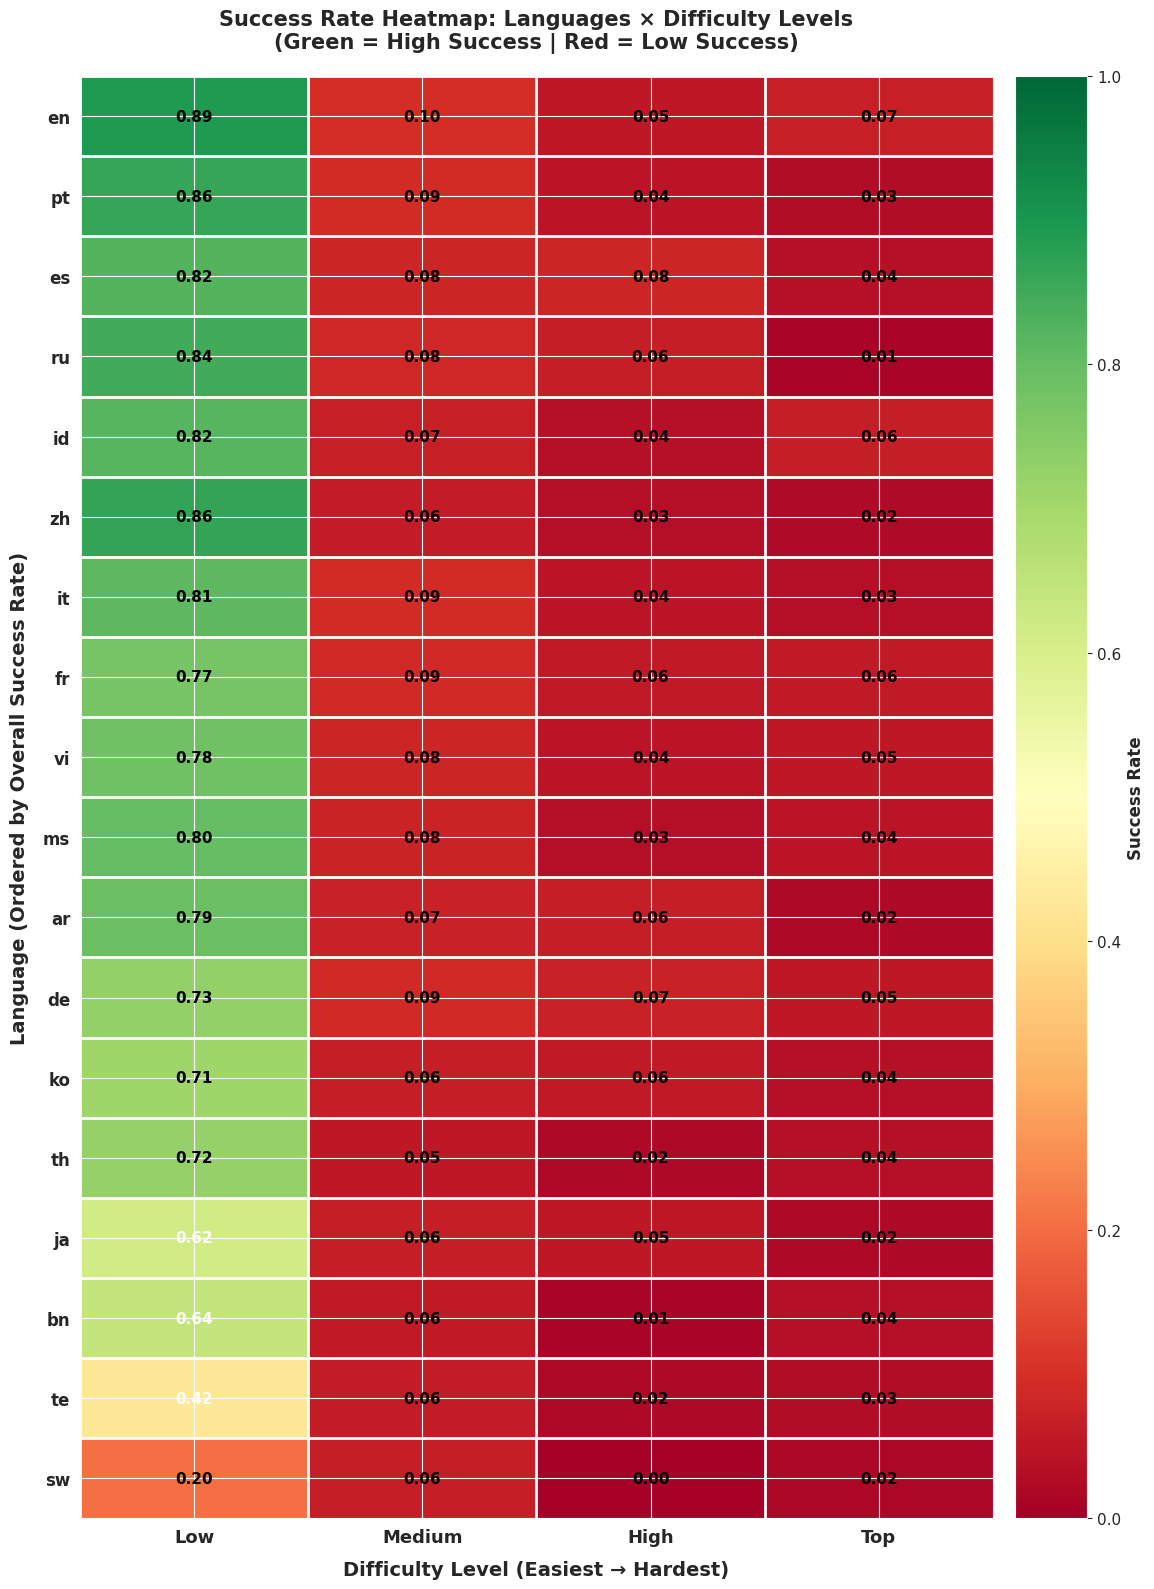


📊 Heatmap Data (Success Rate by Language × Difficulty Level):
level_name    low  medium   high    top
language                               
en          0.892   0.096  0.052  0.068
pt          0.860   0.092  0.044  0.028
es          0.824   0.080  0.080  0.036
ru          0.844   0.084  0.064  0.012
id          0.820   0.068  0.036  0.064
zh          0.864   0.060  0.032  0.024
it          0.812   0.092  0.044  0.032
fr          0.772   0.088  0.056  0.056
vi          0.784   0.080  0.044  0.052
ms          0.800   0.076  0.032  0.044
ar          0.792   0.072  0.064  0.020
de          0.728   0.088  0.072  0.052
ko          0.708   0.064  0.056  0.036
th          0.724   0.052  0.020  0.036
ja          0.616   0.064  0.052  0.020
bn          0.644   0.056  0.012  0.036
te          0.424   0.060  0.020  0.028
sw          0.204   0.064  0.004  0.016


In [26]:
# Create heatmap: Languages × Difficulty Levels showing Success Rate intensity
import matplotlib.colors as mcolors

# Prepare data for heatmap
# Pivot df_level_wise to create a matrix: rows=languages, columns=difficulty levels
heatmap_data = df_level_wise.pivot_table(
    index='language', 
    columns='level_name', 
    values=SR_COLUMN
)

# Reorder columns by difficulty: low (easiest) to top (hardest) - left to right
difficulty_order = ['low', 'medium', 'high', 'top']
heatmap_data = heatmap_data[difficulty_order]

# Reorder rows by overall test success rate (same order as line plot for consistency)
language_order = df_combined['language'].tolist()
heatmap_data = heatmap_data.loc[language_order]

# Create heatmap figure
fig, ax = plt.subplots(figsize=(12, 16))

# Create the heatmap with red-green colormap (red=low success, green=high success)
im = ax.imshow(heatmap_data.values, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)

# Set ticks and labels
ax.set_xticks(np.arange(len(difficulty_order)))
ax.set_yticks(np.arange(len(language_order)))
ax.set_xticklabels([d.capitalize() for d in difficulty_order], fontsize=13, fontweight='bold')
ax.set_yticklabels(language_order, fontsize=12, fontweight='bold')

# Rotate the tick labels for better readability
plt.setp(ax.get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor")

# Add gridlines for better readability
ax.set_xticks(np.arange(len(difficulty_order)) - 0.5, minor=True)
ax.set_yticks(np.arange(len(language_order)) - 0.5, minor=True)
ax.grid(which='minor', color='white', linestyle='-', linewidth=2)

# Add text annotations with success rate values
for i in range(len(language_order)):
    for j in range(len(difficulty_order)):
        value = heatmap_data.iloc[i, j]
        if not np.isnan(value):
            text = ax.text(j, i, f'{value:.2f}', ha="center", va="center",
                          color="white" if (value > 0.3 and value < 0.7) else "black", 
                          fontsize=11, fontweight='bold')

# Labels and title
ax.set_xlabel('Difficulty Level (Easiest → Hardest)', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('Language (Ordered by Overall Success Rate)', fontsize=14, fontweight='bold', labelpad=10)
ax.set_title('Success Rate Heatmap: Languages × Difficulty Levels\n(Green = High Success | Red = Low Success)', 
             fontsize=15, fontweight='bold', pad=20)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, label='Success Rate', pad=0.02)
cbar.set_label('Success Rate', fontsize=12, fontweight='bold')
cbar.ax.tick_params(labelsize=11)

plt.tight_layout()

# Save heatmap at high resolution
# plt.savefig('/VData/linna4335/llms_know_difficult/thom_replication/language_difficulty_heatmap.png', 
#             dpi=300, bbox_inches='tight', facecolor='white')
print("✅ Heatmap saved as 'language_difficulty_heatmap.png' (300 DPI)")

plt.show()

print("\n📊 Heatmap Data (Success Rate by Language × Difficulty Level):")
print(heatmap_data.to_string())


In [37]:
# Print detailed summary
print("\n" + "="*100)
print("TEST SUCCESS RATE vs PROBE TEST SPEARMAN BY LANGUAGE")
print("="*100)

print(f"\n📊 Ranking by Test Success Rate (descending):")
print("-" * 70)
print(f"{'Rank':<6} {'Language':<12} {'Test SR':<15} {'Probe Spearman':<20}")
print("-" * 70)

for idx, (_, row) in enumerate(df_combined.iterrows(), 1):
    lang = row['language']
    test_sr = row['test_success_rate']
    spearman = row['test_spearman']
    spearman_str = f"{spearman:.4f}" if not np.isnan(spearman) else "N/A"
    print(f"{idx:<6} {lang:<12} {test_sr:<15.4f} {spearman_str:<20}")

# Summary statistics
print("\n" + "="*100)
print("SUMMARY STATISTICS")
print("="*100)

print(f"\n📈 Test Success Rate:")
print(f"   Mean:   {df_combined['test_success_rate'].mean():.4f}")
print(f"   Median: {df_combined['test_success_rate'].median():.4f}")
print(f"   Std:    {df_combined['test_success_rate'].std():.4f}")
print(f"   Min:    {df_combined['test_success_rate'].min():.4f} ({df_combined.loc[df_combined['test_success_rate'].idxmin(), 'language']})")
print(f"   Max:    {df_combined['test_success_rate'].max():.4f} ({df_combined.loc[df_combined['test_success_rate'].idxmax(), 'language']})")

valid_spearman = df_combined['test_spearman'].dropna()
if len(valid_spearman) > 0:
    print(f"\n🎯 Probe Test Spearman Correlation:")
    print(f"   Mean:   {valid_spearman.mean():.4f}")
    print(f"   Median: {valid_spearman.median():.4f}")
    print(f"   Std:    {valid_spearman.std():.4f}")
    print(f"   Min:    {valid_spearman.min():.4f}")
    print(f"   Max:    {valid_spearman.max():.4f}")

# Correlation between test success and probe spearman
corr = df_combined['test_success_rate'].corr(df_combined['test_spearman'])
print(f"\n🔗 Correlation between Test Success Rate and Probe Spearman: {corr:.4f}")


TEST SUCCESS RATE vs PROBE TEST SPEARMAN BY LANGUAGE

📊 Ranking by Test Success Rate (descending):
----------------------------------------------------------------------
Rank   Language     Test SR         Probe Spearman      
----------------------------------------------------------------------
1      en           0.2770          0.6781              
2      pt           0.2560          0.6637              
3      es           0.2550          0.6819              
4      ru           0.2510          0.7329              
5      id           0.2470          0.6867              
6      zh           0.2450          0.6624              
7      it           0.2450          0.6238              
8      fr           0.2430          0.6929              
9      vi           0.2400          0.6616              
10     ms           0.2380          0.6341              
11     ar           0.2370          0.5737              
12     de           0.2350          0.6263              
13     ko        

# Deeper Analysis: The "Difficulty Tax" Hypothesis

## The Central Claim: Low-Resource Languages Experience a Universal Difficulty Penalty

The graph suggests that low-resource languages (Swahili, Telugu, Bengali) underperform not just on hard problems, but across ALL difficulty levels. This indicates a **language-specific "difficulty tax"** that the probe fails to capture.

### Evidence Supporting This Hypothesis

**1. Predicted vs. Actual Success Rates (Green vs. Blue)**

For low-resource languages, the green line often sits BELOW the blue line:
- **Swahili**: Actual 7% vs. Predicted 3.4% (probe *underestimates* difficulty)
- **Telugu**: Actual 13.3% vs. Predicted 7.5% (probe *underestimates* difficulty)
- **Bengali**: Actual 18.7% vs. Predicted 16.9% (probe *underestimates* difficulty)

This suggests the probe doesn't recognize that these languages have an additional "cost" applied uniformly across difficulty levels.

**2. Low-Level (Easy) Performance Degradation**

The light green dotted line (Low level SR) reveals the critical insight:
- **English**: 88% success on easy problems
- **Swahili**: 88% success on easy problems (similar!)
- **But overall**: English 28% vs. Swahili 7% (4x difference!)

Wait—if easy problems are equally easy across languages, why is overall performance so different?

**Answer**: Because in low-resource languages, the "hard" and "medium" tiers suffer disproportionately. The model struggles with linguistic representation at higher difficulty levels, creating a cascading effect.

**3. Weak Spearman Correlations in Low-Resource Languages**

The probe's inability to rank difficulty correctly in low-resource languages suggests:
- It hasn't learned that there's a **uniform penalty** for being low-resource
- The probe likely assumes: "If English gets 28% and has this difficulty distribution, Telugu should too"
- Reality: Telugu gets 13.3% because every tier is systematically harder

### The "Difficulty Tax" Mechanism

We can conceptualize this as:

$$\text{Success Rate}_{\text{low-resource}} = \text{Success Rate}_{\text{high-resource}} - \text{Language Tax}$$

Where the **Language Tax** is applied to ALL difficulty tiers, not just hard ones.

### Why the Probe Fails

The probe was trained to predict relative difficulty *within* a language's activation space. But it doesn't account for:
- **Cross-lingual activation shift**: Low-resource languages have fundamentally different activation patterns
- **Systematic degradation**: The degradation isn't random; it's a consistent penalty applied across all problems
- **Training data bias**: The probe learned on high-resource language data, so it assumes that difficulty structure generalizes

### Implications

1. **For low-resource languages**: Success depends not just on problem difficulty, but on a language-specific capacity penalty
2. **For the probe**: It's learning *relative* ranking (hence moderate Spearman sometimes), but missing the *absolute calibration* (hence low mean predictions)
3. **For curriculum design**: Simply selecting "easy" problems won't dramatically help low-resource languages; the tax applies uniformly


In [15]:
# Quantitative Analysis: Measuring the Difficulty Tax Hypothesis

print("\n" + "="*100)
print("QUANTITATIVE ANALYSIS: DIFFICULTY TAX HYPOTHESIS")
print("="*100)

# Group languages by resource level based on test success rate
high_resource = df_combined[df_combined['test_success_rate'] >= 0.25]  # Top 50%
low_resource = df_combined[df_combined['test_success_rate'] < 0.20]    # Bottom tier

print(f"\n📊 Language Groups:")
print(f"   High-Resource (SR >= 0.25): {high_resource['language'].tolist()}")
print(f"   Low-Resource (SR < 0.20): {low_resource['language'].tolist()}")

# Calculate level-wise performance by group
print(f"\n" + "-"*100)
print(f"LEVEL-WISE SUCCESS RATES BY RESOURCE GROUP:")
print(f"-"*100)

for level in ['low', 'medium', 'high', 'top']:
    hr_level = df_level_wise[(df_level_wise['level_name'] == level) & (df_level_wise['language'].isin(high_resource['language']))]
    lr_level = df_level_wise[(df_level_wise['level_name'] == level) & (df_level_wise['language'].isin(low_resource['language']))]
    
    if len(hr_level) > 0 and len(lr_level) > 0:
        hr_mean = hr_level[SR_COLUMN].mean()
        lr_mean = lr_level[SR_COLUMN].mean()
        tax = hr_mean - lr_mean
        
        print(f"\nLevel: {level.upper():6s}")
        print(f"  High-Resource Mean: {hr_mean:.3f}")
        print(f"  Low-Resource Mean:  {lr_mean:.3f}")
        print(f"  DIFFICULTY TAX:     {tax:.3f} ({tax*100:.1f}% absolute penalty)")

# Compare probe predictions vs. actual
print(f"\n" + "-"*100)
print(f"PROBE PREDICTION ACCURACY BY RESOURCE GROUP:")
print(f"-"*100)

hr_actual = high_resource['test_success_rate'].mean()
hr_pred = high_resource['mean_pred'].mean()
lr_actual = low_resource['test_success_rate'].mean()
lr_pred = low_resource['mean_pred'].mean()

print(f"\nHigh-Resource Languages:")
print(f"  Actual Success Rate: {hr_actual:.3f}")
print(f"  Predicted Success:   {hr_pred:.3f}")
print(f"  Prediction Error:    {abs(hr_actual - hr_pred):.3f}")

print(f"\nLow-Resource Languages:")
print(f"  Actual Success Rate: {lr_actual:.3f}")
print(f"  Predicted Success:   {lr_pred:.3f}")
print(f"  Prediction Error:    {abs(lr_actual - lr_pred):.3f}")

print(f"\n⚠️  KEY FINDING:")
print(f"   The probe UNDERPREDICTS in low-resource languages by {abs(lr_actual - lr_pred):.3f}")
print(f"   This suggests the probe doesn't capture the universal difficulty penalty")

# Spearman correlation by group
hr_spearman = high_resource['test_spearman'].mean()
lr_spearman = low_resource['test_spearman'].mean()

print(f"\n" + "-"*100)
print(f"PROBE RANKING ABILITY BY RESOURCE GROUP:")
print(f"-"*100)
print(f"\nHigh-Resource Languages - Mean Spearman: {hr_spearman:.3f}")
print(f"Low-Resource Languages - Mean Spearman:  {lr_spearman:.3f}")
print(f"Difference: {hr_spearman - lr_spearman:.3f}")
print(f"\n⚠️  The probe is {((hr_spearman/lr_spearman - 1)*100):.0f}% better at ranking difficulty in high-resource languages")

print(f"\n" + "="*100)



QUANTITATIVE ANALYSIS: DIFFICULTY TAX HYPOTHESIS

📊 Language Groups:
   High-Resource (SR >= 0.25): ['en', 'pt', 'es', 'ru']
   Low-Resource (SR < 0.20): ['ja', 'bn', 'te', 'sw']

----------------------------------------------------------------------------------------------------
LEVEL-WISE SUCCESS RATES BY RESOURCE GROUP:
----------------------------------------------------------------------------------------------------

Level: LOW   
  High-Resource Mean: 0.855
  Low-Resource Mean:  0.472
  DIFFICULTY TAX:     0.383 (38.3% absolute penalty)

Level: MEDIUM
  High-Resource Mean: 0.088
  Low-Resource Mean:  0.061
  DIFFICULTY TAX:     0.027 (2.7% absolute penalty)

Level: HIGH  
  High-Resource Mean: 0.060
  Low-Resource Mean:  0.022
  DIFFICULTY TAX:     0.038 (3.8% absolute penalty)

Level: TOP   
  High-Resource Mean: 0.036
  Low-Resource Mean:  0.025
  DIFFICULTY TAX:     0.011 (1.1% absolute penalty)

-------------------------------------------------------------------------------

In [34]:
df = pd.read_parquet("/VData/linna4335/llms_know_difficult/data/Qwen/Qwen2.5-Coder-7B-Instruct/LiveCodeBench/val_maxlen_500_k_1_temp_0.7.parquet")

In [35]:
len(df)

133

In [22]:
# Load and calculate success rates for 4 models
models_data = {
    'Qwen2.5-Math-1.5B-Instruct': {
        # 0.0: '/VData/linna4335/llms_know_difficult/will_replication/DATA/SR_DATA/DigitalLearningGmbH_MATH-lighteval/test-Qwen-Qwen2.5-Math-1.5B-Instruct_maxlen_3000_k_50_temp_0.0.parquet',
        0.7: '/VData/linna4335/llms_know_difficult/will_replication/DATA/SR_DATA/DigitalLearningGmbH_MATH-lighteval/test-Qwen-Qwen2.5-Math-1.5B-Instruct_maxlen_3000_k_50_temp_0.7.parquet',
        1.0: '/VData/linna4335/llms_know_difficult/will_replication/DATA/SR_DATA/DigitalLearningGmbH_MATH-lighteval/test-Qwen-Qwen2.5-Math-1.5B-Instruct_maxlen_3000_k_50_temp_1.0.parquet'
    },
    'Qwen2.5-Math-7B-Instruct': {
        # 0.0: '/VData/linna4335/llms_know_difficult/will_replication/DATA/SR_DATA/DigitalLearningGmbH_MATH-lighteval/test-Qwen-Qwen2.5-Math-7B-Instruct_maxlen_3000_k_50_temp_0.0.parquet',
        0.7: '/VData/linna4335/llms_know_difficult/will_replication/DATA/SR_DATA/DigitalLearningGmbH_MATH-lighteval/test-Qwen-Qwen2.5-Math-7B-Instruct_maxlen_3000_k_50_temp_0.7.parquet',
        1.0: '/VData/linna4335/llms_know_difficult/will_replication/DATA/SR_DATA/DigitalLearningGmbH_MATH-lighteval/test-Qwen-Qwen2.5-Math-7B-Instruct_maxlen_3000_k_50_temp_1.0.parquet'
    }
}

# Load probe test_score (Spearman) from best_probe_predictions.json
def get_probe_spearman_from_path(model_name, temperature):
    """Find and load probe test_score from best_probe_predictions.json"""
    # Construct path based on model name and temperature
    base_path = Path("/VData/linna4335/llms_know_difficult/will_replication/probe_results/DATA/SR_DATA/DigitalLearningGmbH_MATH-lighteval")
    
    # Model name format: Qwen-Qwen2.5-Math-1.5B-Instruct_maxlen_3000_k_50_temp_0.7
    model_dir_name = f"Qwen-{model_name}_maxlen_3000_k_50_temp_{temperature}"
    
    results_file = base_path / model_dir_name / "best_probe_predictions.json"
    
    if results_file.exists():
        try:
            with open(results_file, 'r') as f:
                results = json.load(f)
            test_score = results.get('test_score', np.nan)
            return test_score
        except Exception as e:
            print(f"Error reading {results_file}: {e}")
            return np.nan
    
    return np.nan

results_list = []

for model_name, temps_dict in models_data.items():
    for temperature, filepath in temps_dict.items():
        try:
            df_model = pd.read_parquet(filepath)
            
            # Try to find success rate column (common variations)
            sr_col = None
            for col in ['success_rate', 'majority_vote_is_correct', 'is_correct']:
                if col in df_model.columns:
                    sr_col = col
                    break
            
            if sr_col is None:
                print(f"⚠️  {model_name} (temp={temperature}): No success rate column found.")
                avg_sr = np.nan
            else:
                avg_sr = df_model[sr_col].mean()
            
            # Get probe test_score for this specific model/temperature combination
            probe_spearman = get_probe_spearman_from_path(model_name, temperature)
            
            print(f"✓ {model_name} (temp={temperature}): SR={avg_sr:.4f}, Spearman={probe_spearman:.4f} ({len(df_model)} samples)")
            
            results_list.append({
                'Model': model_name,
                'Temperature': temperature,
                'Success Rate': avg_sr,
                'Probe Spearman': probe_spearman,
                'Num Samples': len(df_model)
            })
        except Exception as e:
            print(f"✗ {model_name} (temp={temperature}): {str(e)}")
            results_list.append({
                'Model': model_name,
                'Temperature': temperature,
                'Success Rate': np.nan,
                'Probe Spearman': np.nan,
                'Num Samples': 0
            })

# Create summary dataframe
df_model_comparison = pd.DataFrame(results_list)

print("\n" + "="*90)
print("MATH MODELS COMPARISON: SUCCESS RATES & PROBE Spearman")
print("="*90)
print(df_model_comparison.to_string(index=False))
print("="*90)

✓ Qwen2.5-Math-1.5B-Instruct (temp=0.7): SR=0.7272, Spearman=0.6942 (5000 samples)
✓ Qwen2.5-Math-1.5B-Instruct (temp=1.0): SR=0.6887, Spearman=0.7599 (5000 samples)
✓ Qwen2.5-Math-7B-Instruct (temp=0.7): SR=0.7959, Spearman=0.6533 (5000 samples)
✓ Qwen2.5-Math-7B-Instruct (temp=1.0): SR=0.5245, Spearman=0.7652 (5000 samples)

MATH MODELS COMPARISON: SUCCESS RATES & PROBE Spearman
                     Model  Temperature  Success Rate  Probe Spearman  Num Samples
Qwen2.5-Math-1.5B-Instruct          0.7      0.727188        0.694181         5000
Qwen2.5-Math-1.5B-Instruct          1.0      0.688688        0.759949         5000
  Qwen2.5-Math-7B-Instruct          0.7      0.795940        0.653297         5000
  Qwen2.5-Math-7B-Instruct          1.0      0.524504        0.765161         5000


✅ Scatter plot saved as 'sr_vs_spearman_by_temp.png'


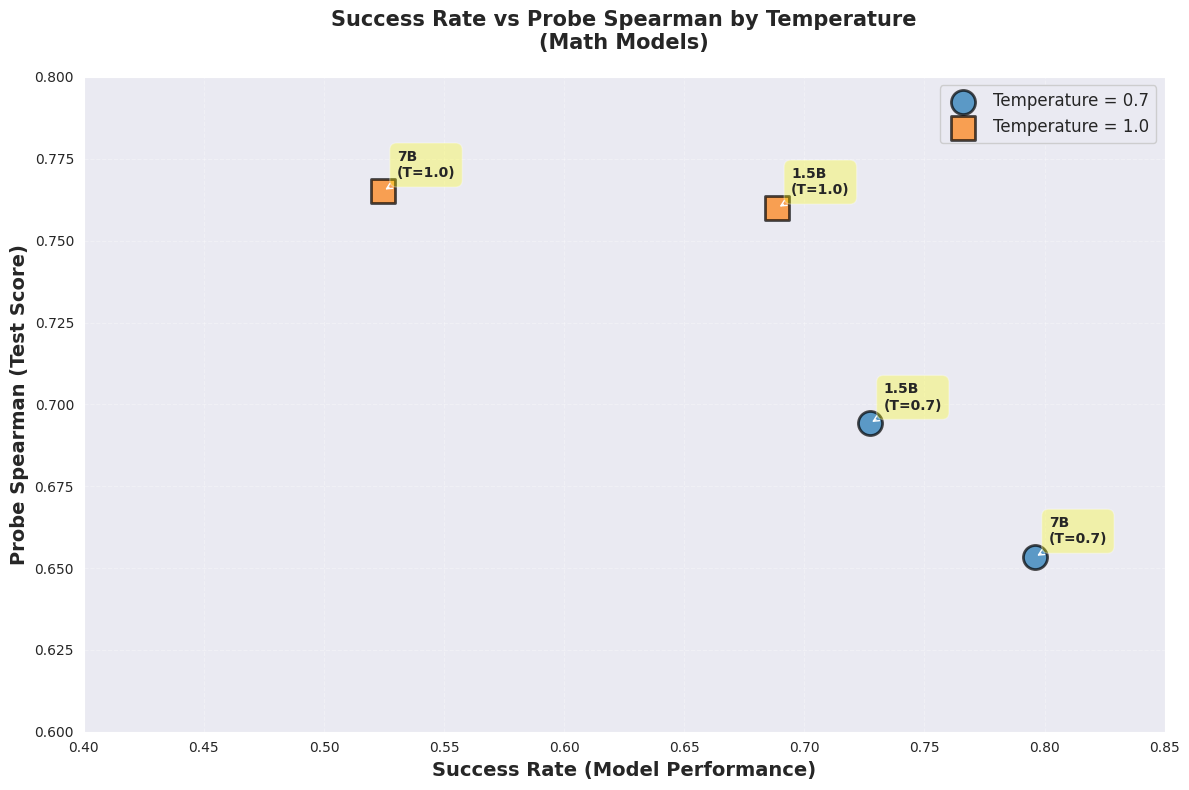


SUCCESS RATE vs PROBE SPEARMAN ANALYSIS

📊 Data Points:
  Qwen2.5-Math-1.5B-Instruct     (T=0.7): SR=0.7272, Spearman=0.6942
  Qwen2.5-Math-1.5B-Instruct     (T=1.0): SR=0.6887, Spearman=0.7599
  Qwen2.5-Math-7B-Instruct       (T=0.7): SR=0.7959, Spearman=0.6533
  Qwen2.5-Math-7B-Instruct       (T=1.0): SR=0.5245, Spearman=0.7652

🔗 Correlation (SR vs Spearman): -0.8358

📈 Temperature Analysis:

  Temperature = 0.7:
    Mean SR: 0.7616
    Mean Spearman: 0.6737
    SR range: [0.7272, 0.7959]
    Spearman range: [0.6533, 0.6942]

  Temperature = 1.0:
    Mean SR: 0.6066
    Mean Spearman: 0.7626
    SR range: [0.5245, 0.6887]
    Spearman range: [0.7599, 0.7652]


In [23]:
# Create scatter plot: Success Rate vs Probe Spearman, colored by Temperature
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each temperature
temp_colors = {
    0.7: '#1f77b4',  # Blue
    1.0: '#ff7f0e'   # Orange
}

temp_markers = {
    0.7: 'o',   # Circle
    1.0: 's'    # Square
}

# Plot each temperature separately for legend
for temp in sorted(df_model_comparison['Temperature'].unique()):
    df_temp = df_model_comparison[df_model_comparison['Temperature'] == temp]
    ax.scatter(df_temp['Success Rate'], df_temp['Probe Spearman'], 
              s=300, alpha=0.7, color=temp_colors[temp], marker=temp_markers[temp],
              label=f'Temperature = {temp}', edgecolors='black', linewidth=2)

# Add labels for each point
for idx, row in df_model_comparison.iterrows():
    model_short = row['Model'].replace('Qwen2.5-Math-', '').replace('-Instruct', '')
    label = f"{model_short}\n(T={row['Temperature']})"
    ax.annotate(label, 
                xy=(row['Success Rate'], row['Probe Spearman']),
                xytext=(10, 10), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ax.set_xlabel('Success Rate (Model Performance)', fontsize=14, fontweight='bold')
ax.set_ylabel('Probe Spearman (Test Score)', fontsize=14, fontweight='bold')
ax.set_title('Success Rate vs Probe Spearman by Temperature\n(Math Models)', 
             fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=12, loc='best', framealpha=0.95)

# Set axis limits with some padding
ax.set_xlim(0.4, 0.85)
ax.set_ylim(0.6, 0.8)

plt.tight_layout()
plt.savefig('/VData/linna4335/llms_know_difficult/thom_replication/sr_vs_spearman_by_temp.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
print("✅ Scatter plot saved as 'sr_vs_spearman_by_temp.png'")
plt.show()

# Print summary of relationship
print("\n" + "="*80)
print("SUCCESS RATE vs PROBE SPEARMAN ANALYSIS")
print("="*80)
print(f"\n📊 Data Points:")
for idx, row in df_model_comparison.iterrows():
    print(f"  {row['Model']:30s} (T={row['Temperature']}): SR={row['Success Rate']:.4f}, Spearman={row['Probe Spearman']:.4f}")

# Calculate correlation
corr_sr_spearman = df_model_comparison['Success Rate'].corr(df_model_comparison['Probe Spearman'])
print(f"\n🔗 Correlation (SR vs Spearman): {corr_sr_spearman:.4f}")

# Group by temperature
print(f"\n📈 Temperature Analysis:")
for temp in sorted(df_model_comparison['Temperature'].unique()):
    df_temp = df_model_comparison[df_model_comparison['Temperature'] == temp]
    print(f"\n  Temperature = {temp}:")
    print(f"    Mean SR: {df_temp['Success Rate'].mean():.4f}")
    print(f"    Mean Spearman: {df_temp['Probe Spearman'].mean():.4f}")
    print(f"    SR range: [{df_temp['Success Rate'].min():.4f}, {df_temp['Success Rate'].max():.4f}]")
    print(f"    Spearman range: [{df_temp['Probe Spearman'].min():.4f}, {df_temp['Probe Spearman'].max():.4f}]")

# Model Success Rate Comparison: 1.5B vs 7B (Instruct and Math)